In [3]:
!ls ../data

README.md
sample_submission.csv
test.csv
train.csv
train_labels.csv


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import util


In [7]:
DATADIR = "../data"

In [8]:
CSV_NAME_TRAIN = 'train.csv'
CSV_NAME_TEST = 'test.csv'
CSV_NAME_TRAIN_LABELS = 'train_labels.csv'


In [9]:
df_train = pd.read_csv(os.path.join(DATADIR,CSV_NAME_TRAIN))
df_train_labels = pd.read_csv(os.path.join(DATADIR,CSV_NAME_TRAIN_LABELS))
df_test = pd.read_csv(os.path.join(DATADIR,CSV_NAME_TEST))


In [7]:
df_train.head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0         0       47     0  -0.196291   0.112395        1.0   0.329204   
1         0       47     1  -0.447450   0.134454        1.0  -0.658407   
2         0       47     2   0.326893  -0.694328        1.0   0.330088   
3         0       47     3   0.523184   0.751050        1.0   0.976991   
4         0       47     4   0.272025   1.074580        1.0  -0.136283   

   sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0  -1.004660  -0.131638  -0.127505   0.368702       -0.1  -0.963873   
1   0.162495   0.340314  -0.209472  -0.867176        0.2  -0.301301   
2   0.473678   1.280479  -0.094718   0.535878        1.4   1.002168   
3  -0.563287  -0.720269   0.793260   0.951145       -0.3  -0.995665   
4   0.398579   0.044877   0.560109  -0.541985       -0.9   1.055636   

   sensor_10  sensor_11  sensor_12  
0  -0.985069   0.531893   4.751492  
1   0.082733  -0.231481   0.454390  
2   0.449221  -0.586420  -4.736147  
3  -0.434290   1.344650   0.429241  
4   0.812631   0.123457  -0.223359

In [12]:
df_train['sensor_00']

0         -0.196291
1         -0.447450
2          0.326893
3          0.523184
4          0.272025
             ...   
1558075   -0.282844
1558076    0.130603
1558077   -0.579598
1558078    1.278980
1558079   -1.136012
Name: sensor_00, Length: 1558080, dtype: float64

In [9]:
df_train.describe()

sequence       subject          step     sensor_00     sensor_01  \
count  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06   
mean   1.298350e+04  3.316331e+02  2.950000e+01  4.365526e-04 -1.034982e-03   
std    7.496318e+03  1.958257e+02  1.731811e+01  2.658684e+00  4.404200e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00 -3.750634e+02 -4.345977e+02   
25%    6.491750e+03  1.617500e+02  1.475000e+01 -5.000000e-01 -4.831933e-01   
50%    1.298350e+04  3.350000e+02  2.950000e+01 -3.091190e-03  3.151261e-03   
75%    1.947525e+04  5.010000e+02  4.425000e+01  4.845440e-01  4.926471e-01   
max    2.596700e+04  6.710000e+02  5.900000e+01  3.358246e+02  4.495914e+02   

          sensor_02     sensor_03     sensor_04     sensor_05     sensor_06  \
count  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06   
mean  -2.178045e-01 -2.156555e-03 -1.828903e-03 -1.651785e-03 -4.122917e-04   
std    2.298002e+00  3.934184e+00  1.683685e+00  1.590818e+00  3.345143e+00   
min   -3.165948e+01 -4.083761e+02 -2.362601e+01 -7.498280e+01 -4.705046e+02   
25%   -6.461531e-01 -4.929204e-01 -4.729928e-01 -4.786836e-01 -4.927140e-01   
50%    0.000000e+00  0.000000e+00 -1.589577e-03  2.991773e-03  9.107468e-04   
75%    3.338469e-01  4.893805e-01  4.701565e-01  5.056096e-01  4.927140e-01   
max    1.666667e+00  4.366504e+02  2.487286e+01  7.791548e+01  4.425009e+02   

          sensor_07     sensor_08     sensor_09     sensor_10     sensor_11  \
count  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06  1.558080e+06   
mean  -2.620665e-05 -1.298393e-04  1.365584e-03  3.315801e-04 -3.733291e-03   
std    3.243428e+00  4.501534e+00  2.592913e+00  1.917333e+00  4.532568e+00   
min   -4.070115e+02 -5.361000e+02 -2.703468e+02 -4.341271e+01 -4.270586e+02   
25%   -5.022901e-01 -5.000000e-01 -5.151734e-01 -4.787939e-01 -4.835391e-01   
50%   -2.290076e-03  0.000000e+00 -1.445087e-03 -1.655822e-03  3.086420e-03   
75%    4.847328e-01  5.000000e-01  5.086705e-01  4.780386e-01  4.938272e-01   
max    3.312542e+02  6.301000e+02  3.679812e+02  4.186559e+01  4.480206e+02   

          sensor_12  
count  1.558080e+06  
mean  -1.172605e-02  
std    3.911767e+01  
min   -6.125494e+02  
25%   -5.805627e-01  
50%    0.000000e+00  
75%    5.703325e-01  
max    6.305111e+02

In [17]:

print(len(np.unique(df_train['sequence'])))
print(len(np.unique(df_train['subject'])))

print(len(np.unique(df_train['sequence']))/len(np.unique(df_train['subject'])))

25968
672
38.642857142857146


There are on average about 38 sequences recorded from each subject.

sequence


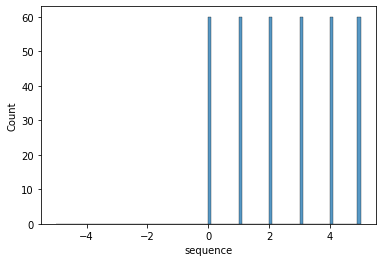

subject


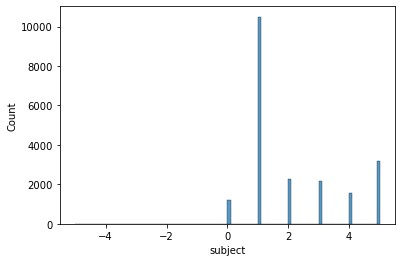

step


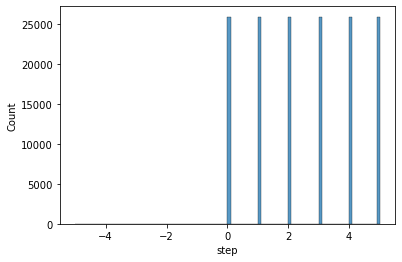

sensor_00


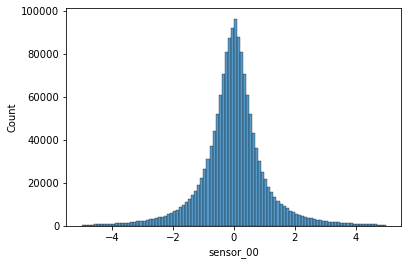

sensor_01


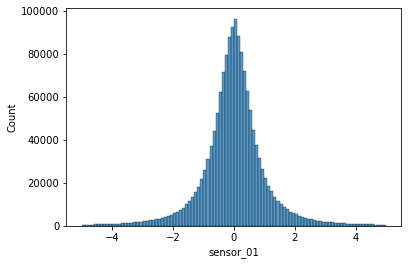

sensor_02


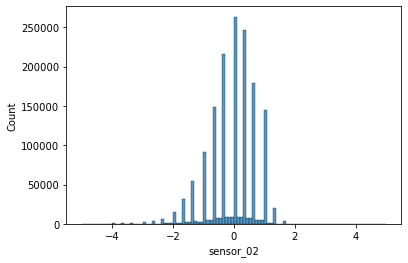

sensor_03


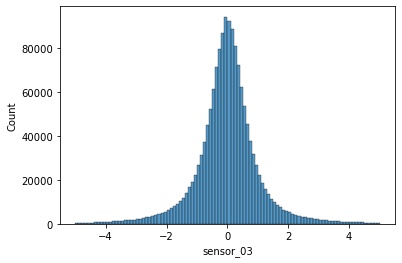

sensor_04


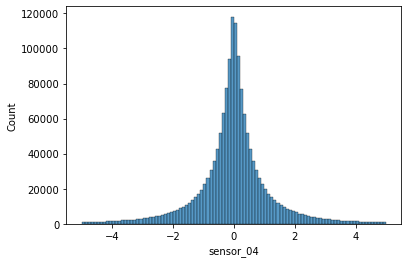

sensor_05


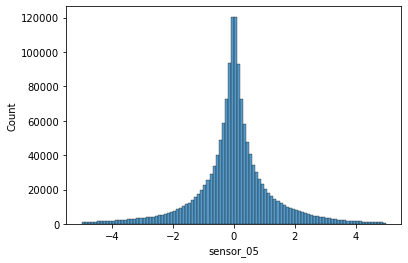

sensor_06


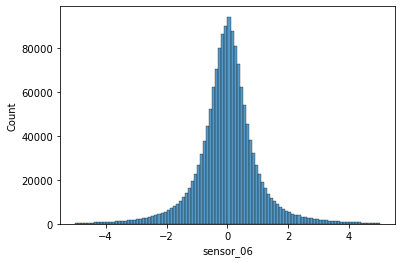

sensor_07


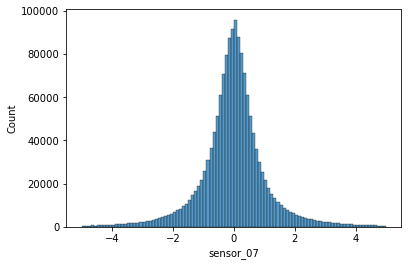

sensor_08


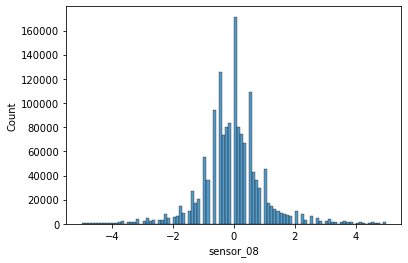

sensor_09


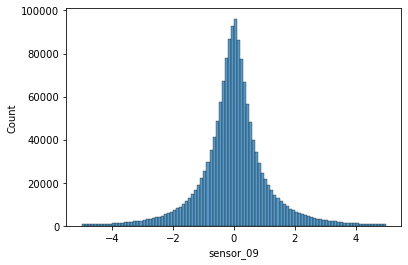

sensor_10


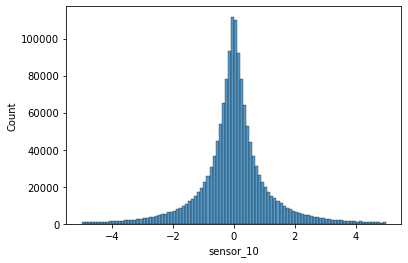

sensor_11


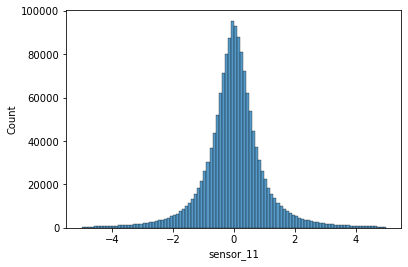

sensor_12


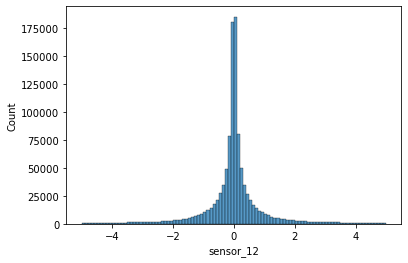

In [32]:
#plot the histograms of train data columns
for column_name in df_train.columns:
    print(column_name)
    #range_start = np.percentile(df_train[column_name],5)
    #range_end = np.percentile(df_train[column_name],95)
    
    range_start=-5
    range_end=5
    
    sns.histplot(df_train[column_name], bins=100, binrange=(range_start, range_end))
    plt.show()
    

With outliers excluded, the scales of the different sensors are comparable
Some sensors have Gaussian distribution, for some sensors the distribution is more center-heavy (Laplace?)

Sensor 02 is an interesting case. Most of the values are very discretely distributed, but some values 
are in between the levels. Is there something into this?

Something similar could be going on with sensor 08

sequence


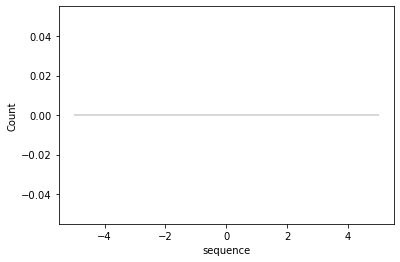

subject


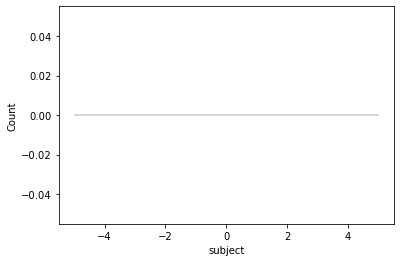

step


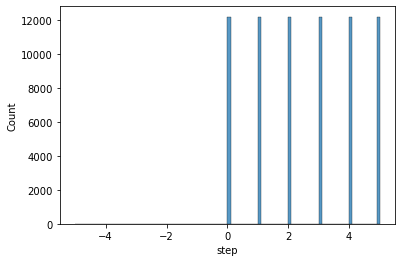

sensor_00


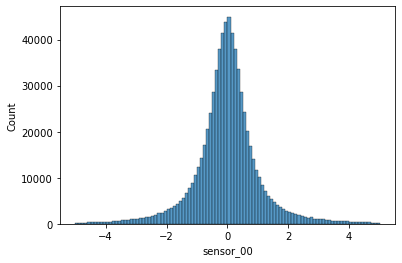

sensor_01


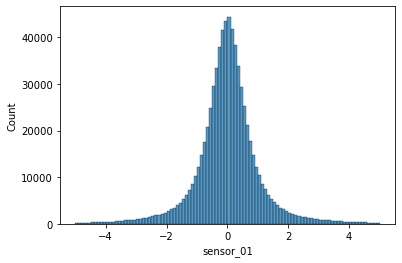

sensor_02


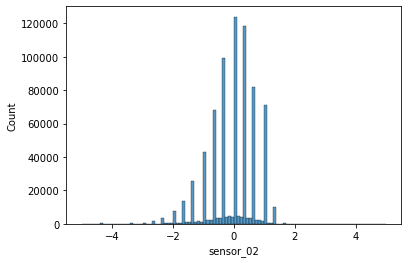

sensor_03


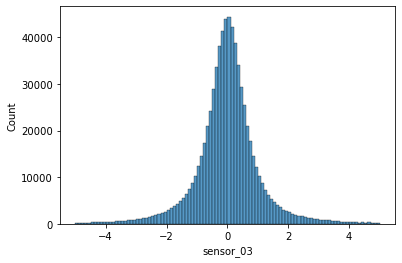

sensor_04


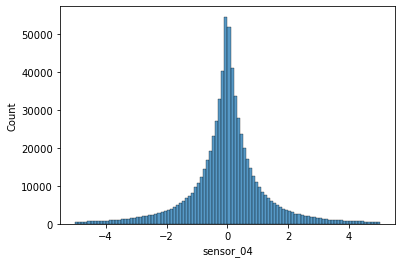

sensor_05


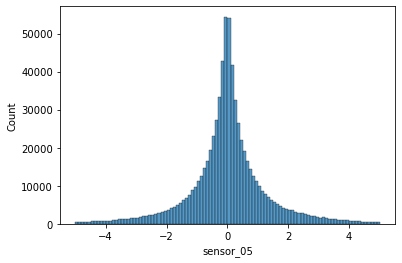

sensor_06


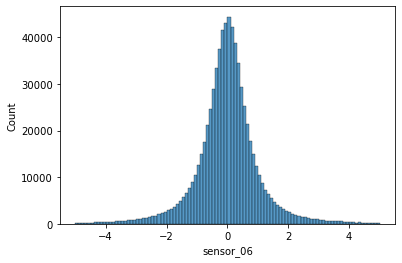

sensor_07


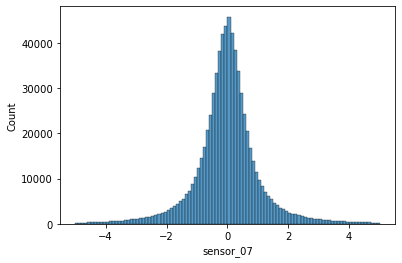

sensor_08


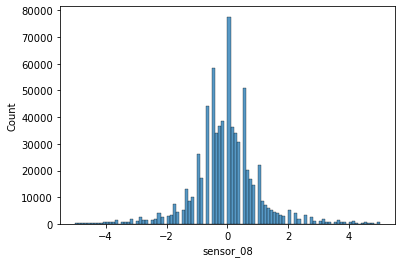

sensor_09


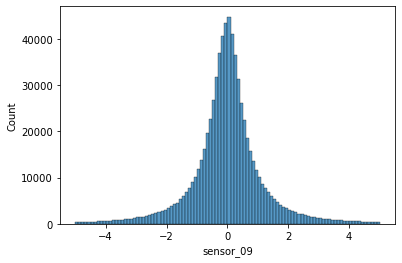

sensor_10


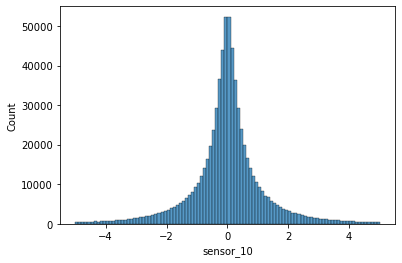

sensor_11


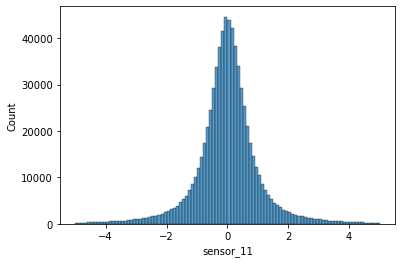

sensor_12


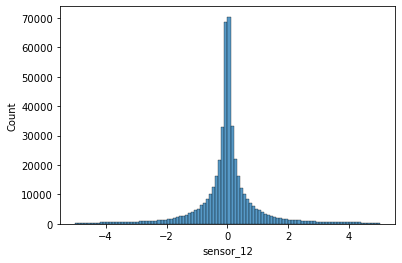

In [33]:
# plot histograms for the test data

for column_name in df_test.columns:
    print(column_name)
    #range_start = np.percentile(df_train[column_name],5)
    #range_end = np.percentile(df_train[column_name],95)
    
    range_start=-5
    range_end=5
    
    sns.histplot(df_test[column_name], bins=100, binrange=(range_start, range_end))
    plt.show()

 Distributions seem rather similar. This should be checked by plotting the distributions together.

In [35]:
# now try to find out how much the sets of subjects overlap between train and test

print(np.unique(df_train['subject']))
print(np.unique(df_test['subject']))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

sensor_00


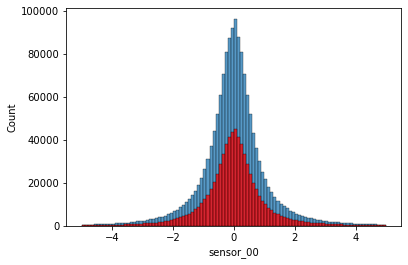

sensor_01


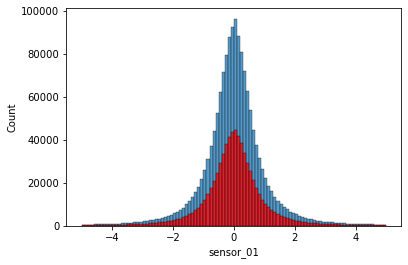

sensor_02


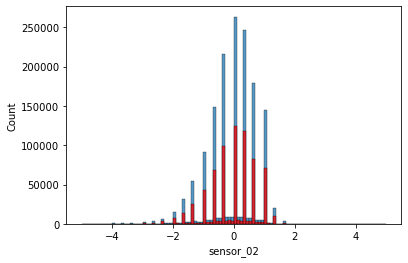

sensor_03


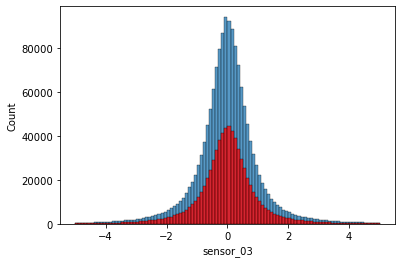

sensor_04


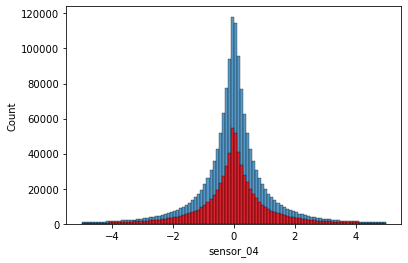

sensor_05


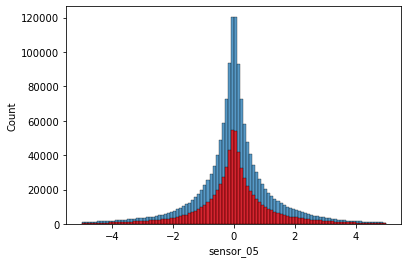

sensor_06


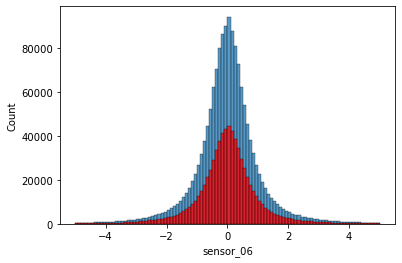

sensor_07


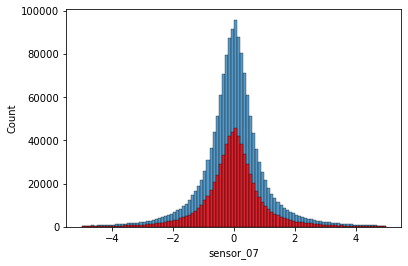

sensor_08


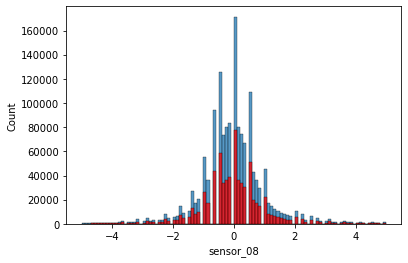

sensor_09


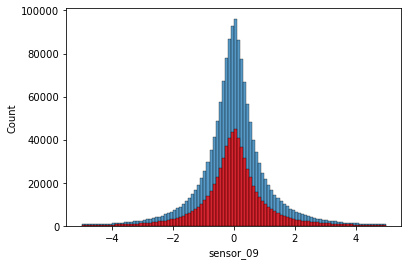

sensor_10


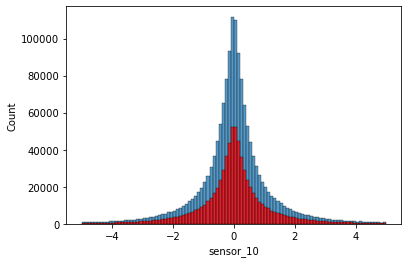

sensor_11


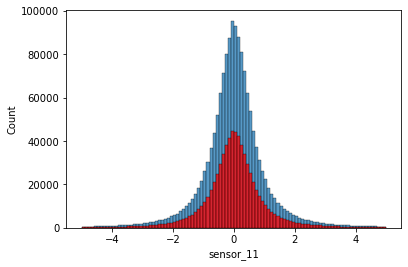

sensor_12


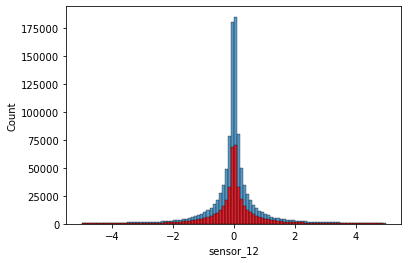

In [41]:
for column_name in [c for c in df_test.columns if 'sensor' in c]:
    print(column_name)
    
    fig, ax = plt.subplots()
    sns.histplot(df_train[column_name], ax=ax, legend='train', bins=100, binrange=(-5,5))
    sns.histplot(df_test[column_name], ax=ax, legend='test', color='r', bins=100, binrange=(-5,5))
    plt.show()


This confirms the sensor distributions to be similar in the training and testing data.

The sets of subjects do not overlap at all. Therefore, the subject number does not need to be 
included in the set of predictors.


In [ ]:
#inject the training state labels back into the step-wise traininng data

#plan is to generate first simple submissions by training  step-wise classifiers
# and to combine the results for each sequence

# also create scatterplots with each sensor alone vs the label


In [ ]:
CSV_LABELS = 'train_labels.csv'
df_train_labels = pd.read_csv(

In [1]:
!ls ../data

README.md
sample_submission.csv
test.csv
train.csv
train_labels.csv


In [10]:
df_train_labels.head()

sequence  state
0         0      0
1         1      1
2         2      1
3         3      1
4         4      1

In [17]:
sequence_to_state ={}
for _,row in df_train_labels.iterrows():
    sequence_to_state[row['sequence']] = row['state']


In [22]:
df_train_augmented=pd.concat([df_train,df_train['sequence'].map(sequence_to_state).rename('state')], axis=1)

In [30]:
df_train_augmented.head(400)

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0           0       47     0  -0.196291   0.112395    1.00000   0.329204   
1           0       47     1  -0.447450   0.134454    1.00000  -0.658407   
2           0       47     2   0.326893  -0.694328    1.00000   0.330088   
3           0       47     3   0.523184   0.751050    1.00000   0.976991   
4           0       47     4   0.272025   1.074580    1.00000  -0.136283   
..        ...      ...   ...        ...        ...        ...        ...   
395         6      246    35   0.655332   1.000000   -0.33282   0.879646   
396         6      246    36   0.746522  -0.569328   -0.33282  -0.994690   
397         6      246    37  -1.472952   0.255252   -0.33282   0.311504   
398         6      246    38   0.445904  -1.098739   -0.33282   0.885841   
399         6      246    39  -0.000773   0.794118   -0.33282  -1.211504   

     sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0    -1.004660  -0.131638  -0.127505   0.368702       -0.1  -0.963873   
1     0.162495   0.340314  -0.209472  -0.867176        0.2  -0.301301   
2     0.473678   1.280479  -0.094718   0.535878        1.4   1.002168   
3    -0.563287  -0.720269   0.793260   0.951145       -0.3  -0.995665   
4     0.398579   0.044877   0.560109  -0.541985       -0.9   1.055636   
..         ...        ...        ...        ...        ...        ...   
395   0.255969  -0.708302   1.143898   0.366412       -0.6   0.114884   
396   2.726639   0.364996   0.232240  -0.843511        0.5   1.074422   
397   2.759070  -0.875841  -1.220401   0.232824       -0.2  -1.450867   
398  -2.224411   0.805535  -0.015483   0.973282       -0.9   0.296243   
399  -2.842507   0.252805   0.236794  -1.041985        0.2   0.297688   

     sensor_10  sensor_11  sensor_12  state  
0    -0.985069   0.531893   4.751492      0  
1     0.082733  -0.231481   0.454390      0  
2     0.449221  -0.586420  -4.736147      0  
3    -0.434290   1.344650   0.429241      0  
4     0.812631   0.123457  -0.223359      0  
..         ...        ...        ...    ...  
395  -0.711771   0.853909   0.045183      0  
396  -1.819719  -1.406379   0.069906      0  
397  -1.345079   1.635802  -0.168798      0  
398   1.705525  -0.795267   0.082694      0  
399   2.459069  -0.258230   0.301790      0  

[400 rows x 17 columns]

In [29]:
sequence_to_state[6]

0

C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sensor_00', ylabel='state'>

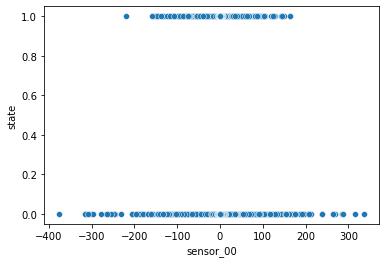

In [32]:
sns.scatterplot(df_train_augmented['sensor_00'],df_train_augmented['state'])

sensor_00


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


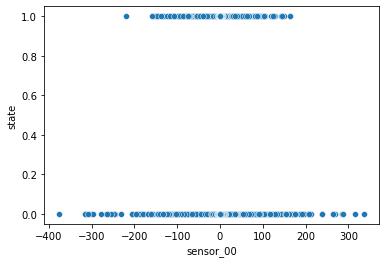

sensor_01


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


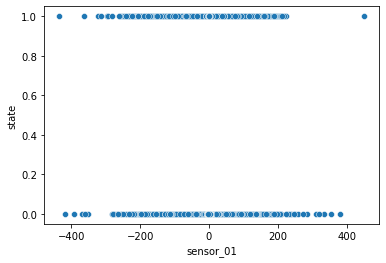

sensor_02


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


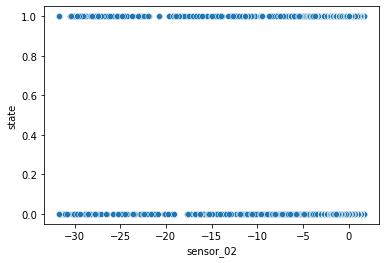

sensor_03


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


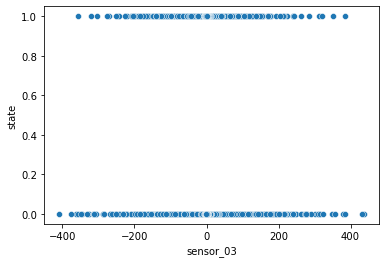

sensor_04


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


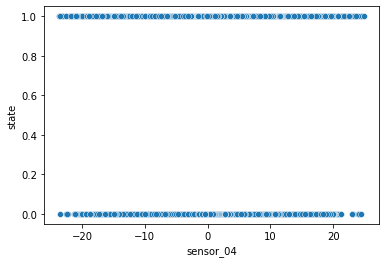

sensor_05


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


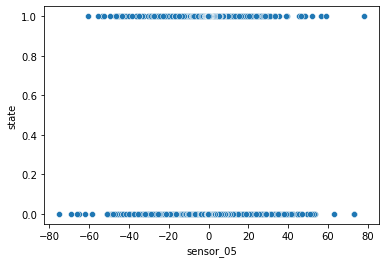

sensor_06


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


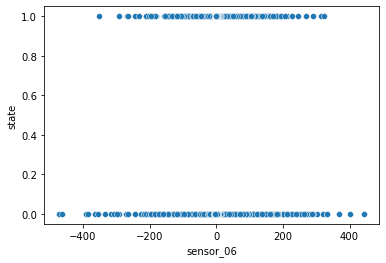

sensor_07


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


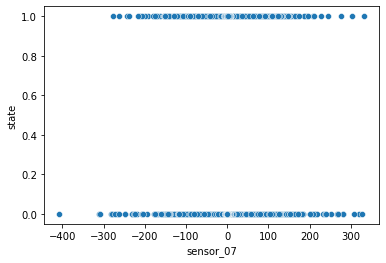

sensor_08


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


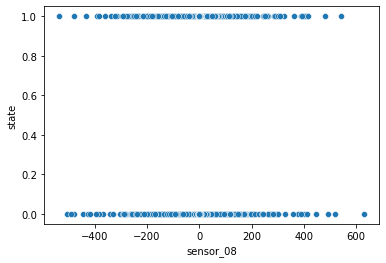

sensor_09


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


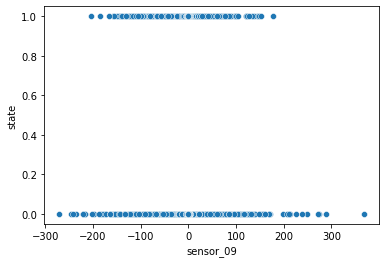

sensor_10


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


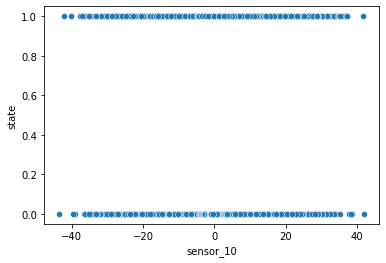

sensor_11


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


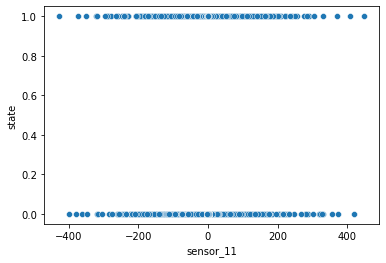

sensor_12


C:\Users\ville\anaconda3\envs\kaggle-tps-apr2022-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


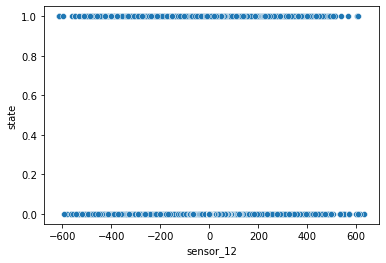

In [35]:
# see whether any value from a specific sensor implies certain state
for column_name in [c for c in df_train_augmented.columns if 'sensor' in c]:
    print(column_name)
    fig, ax = plt.subplots()
    sns.scatterplot(df_train_augmented[column_name],df_train_augmented['state'], ax=ax)
    plt.show()

Very large outliers in some sensors seem to imply state 0

Probably not a major effect

In [ ]:
# the same zoomed in to the center of the range
for column_name in [c for c in df_train_augmented.columns if 'sensor' in c]:
    print(column_name)
    fig, ax = plt.subplots()
    sns.scatterplot(df_train_augmented[column_name],df_train_augmented['state'], ax=ax)
    ax.set_xlim(-2,2)
    plt.show()

In [36]:
sensor_columns = [c for c in df_train.columns if 'sensor' in c]

In [37]:
sensor_columns

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12']

In [39]:
df_train[sensor_columns]

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0        -0.196291   0.112395   1.000000   0.329204  -1.004660  -0.131638   
1        -0.447450   0.134454   1.000000  -0.658407   0.162495   0.340314   
2         0.326893  -0.694328   1.000000   0.330088   0.473678   1.280479   
3         0.523184   0.751050   1.000000   0.976991  -0.563287  -0.720269   
4         0.272025   1.074580   1.000000  -0.136283   0.398579   0.044877   
...            ...        ...        ...        ...        ...        ...   
1558075  -0.282844  -1.217437  -1.666153   0.586726  -0.930698  -0.451010   
1558076   0.130603   0.349790  -1.666153  -0.324779   0.775324  -0.332835   
1558077  -0.579598   0.429622  -1.666153   0.319469   0.308861   0.282723   
1558078   1.278980   1.711134  -1.522820   0.802655  -0.460541  -0.055348   
1558079  -1.136012  -3.702731  -1.332820  -0.766372  -0.430027  -0.091997   

         sensor_06  sensor_07  sensor_08  sensor_09  sensor_10  sensor_11  \
0        -0.127505   0.368702       -0.1  -0.963873  -0.985069   0.531893   
1        -0.209472  -0.867176        0.2  -0.301301   0.082733  -0.231481   
2        -0.094718   0.535878        1.4   1.002168   0.449221  -0.586420   
3         0.793260   0.951145       -0.3  -0.995665  -0.434290   1.344650   
4         0.560109  -0.541985       -0.9   1.055636   0.812631   0.123457   
...            ...        ...        ...        ...        ...        ...   
1558075  -0.651184   0.368702        0.4   0.008671  -0.723536  -0.353909   
1558076   0.099271   0.122137       -0.2   0.644509   0.691407  -0.613169   
1558077  -0.512750   0.012214       -1.6  -0.424133   0.716855   1.628601   
1558078   2.405282   0.043511        1.9   0.283960  -0.914914   0.364198   
1558079  -2.512750  -0.022901       -1.1  -0.653902  -0.418516  -1.453704   

         sensor_12  
0         4.751492  
1         0.454390  
2        -4.736147  
3         0.429241  
4        -0.223359  
...            ...  
1558075  -0.914749  
1558076  -0.515772  
1558077   0.928389  
1558078   0.211424  
1558079  -1.561381  

[1558080 rows x 13 columns]

In [ ]:
# look at a few samples of the sensor graphs as time signals

In [2]:
sensor_data_train, sequence_ids_train, labels_train = util.ingest_sensor_data('train.csv','train_labels.csv')

(25968, 13, 60) 25968


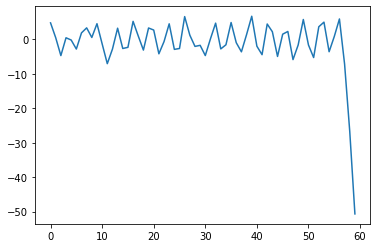

In [3]:
sequence_nr = 0
sensor_nr = 12




plt.plot(sensor_data_train[sequence_nr, sensor_nr, :])
plt.show()

sensor #0
sequence #0 state=0


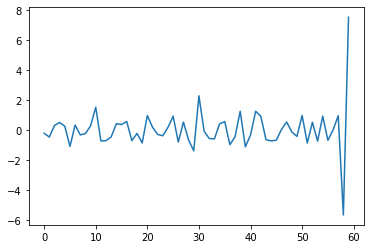

sequence #1 state=1


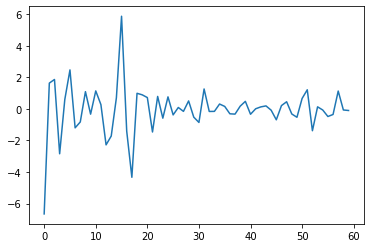

sequence #2 state=1


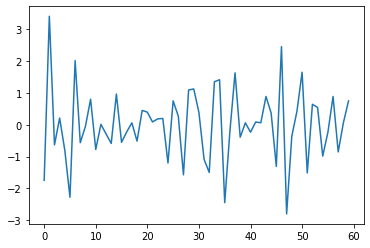

sequence #3 state=1


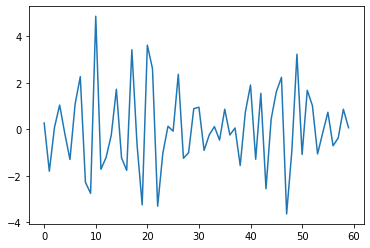

sequence #4 state=1


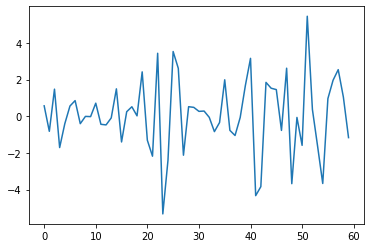

sequence #5 state=1


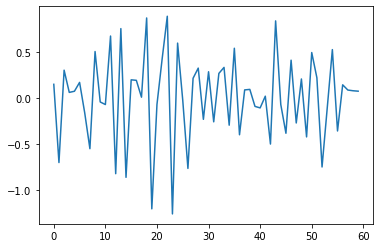

sequence #6 state=0


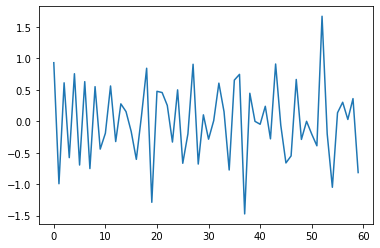

sequence #7 state=0


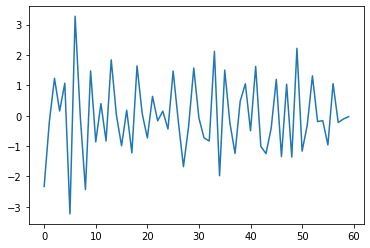

sequence #8 state=0


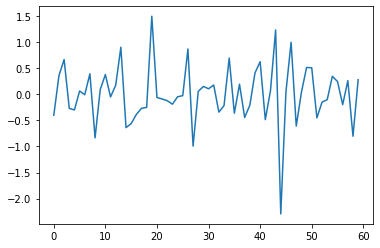

sequence #9 state=0


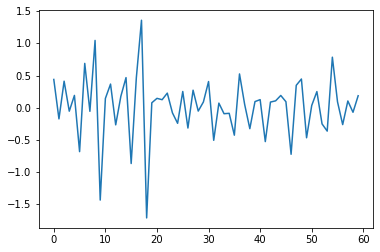

sequence #10 state=0


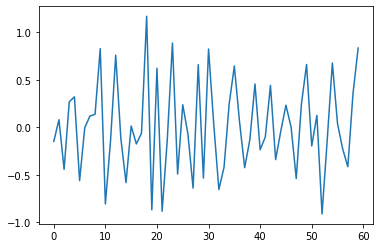

sequence #11 state=1


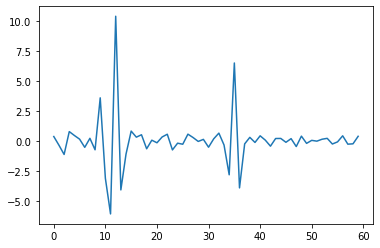

sensor #1
sequence #0 state=0


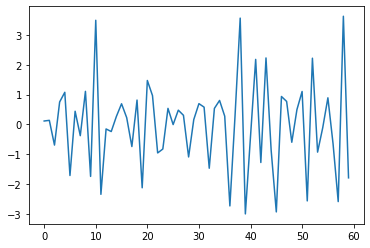

sequence #1 state=1


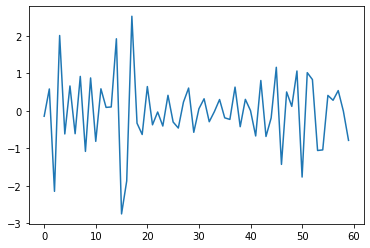

sequence #2 state=1


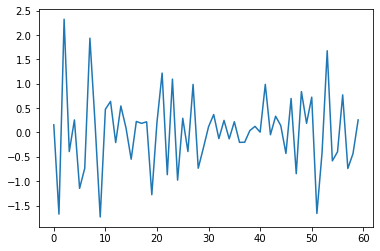

sequence #3 state=1


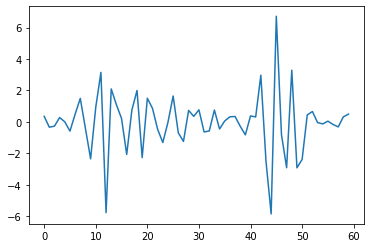

sequence #4 state=1


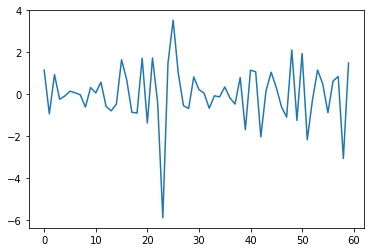

sequence #5 state=1


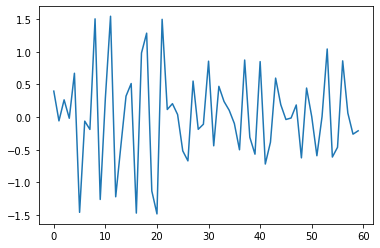

sequence #6 state=0


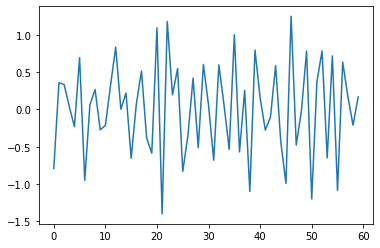

sequence #7 state=0


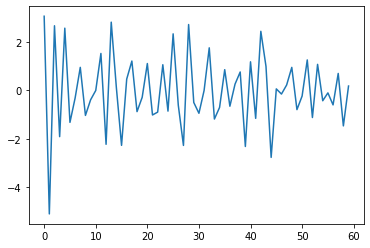

sequence #8 state=0


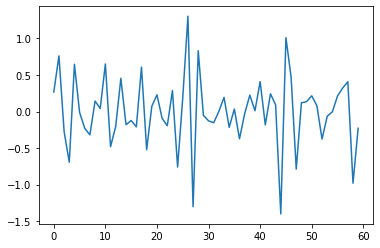

sequence #9 state=0


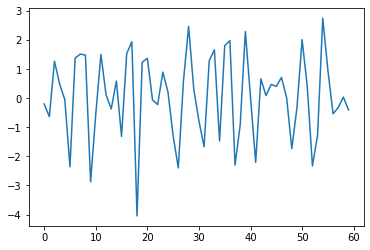

sequence #10 state=0


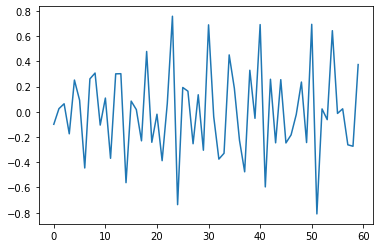

sequence #11 state=1


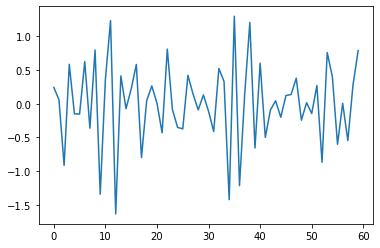

sensor #2
sequence #0 state=0


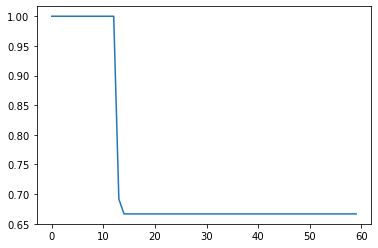

sequence #1 state=1


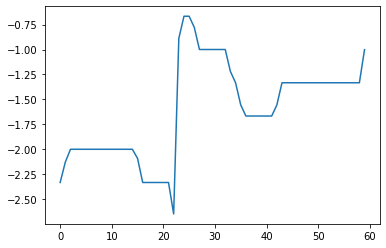

sequence #2 state=1


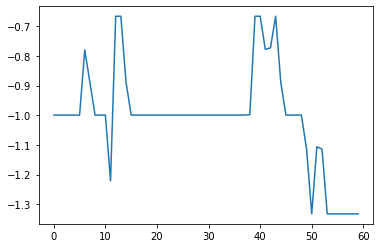

sequence #3 state=1


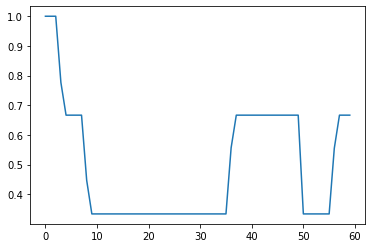

sequence #4 state=1


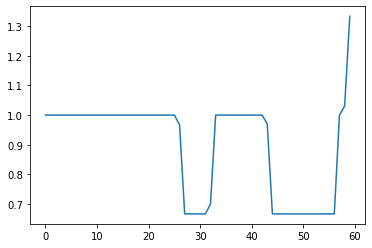

sequence #5 state=1


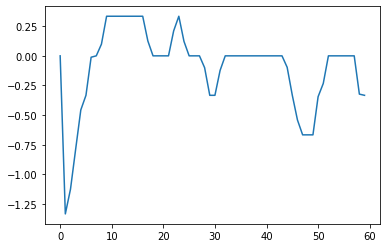

sequence #6 state=0


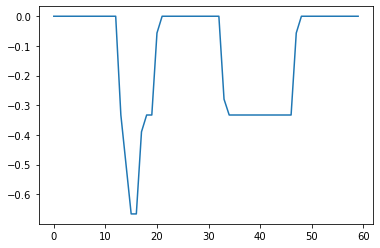

sequence #7 state=0


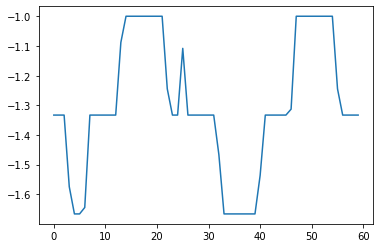

sequence #8 state=0


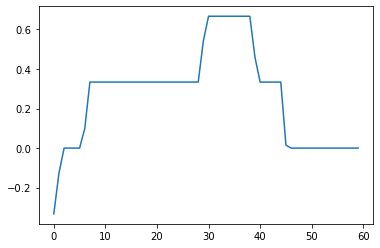

sequence #9 state=0


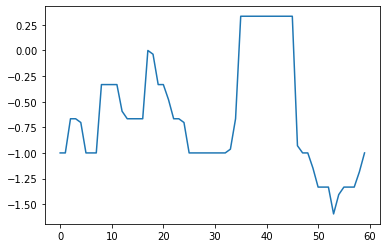

sequence #10 state=0


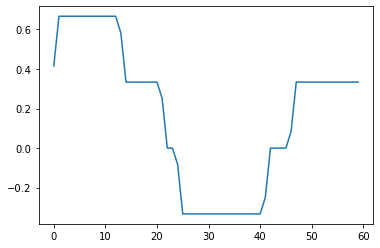

sequence #11 state=1


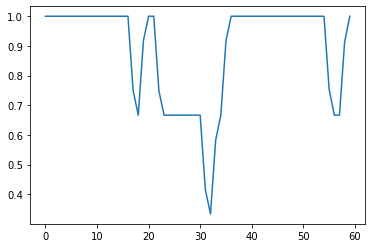

sensor #3
sequence #0 state=0


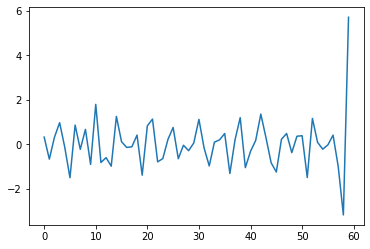

sequence #1 state=1


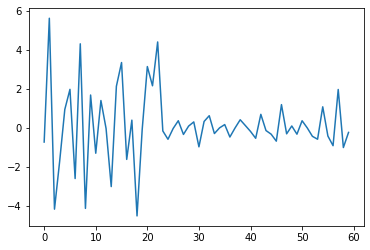

sequence #2 state=1


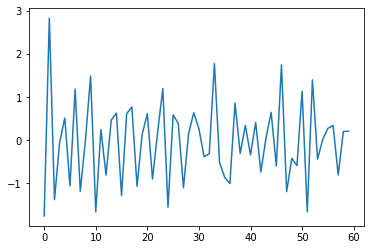

sequence #3 state=1


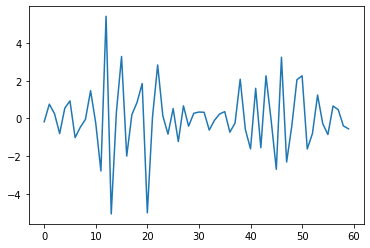

sequence #4 state=1


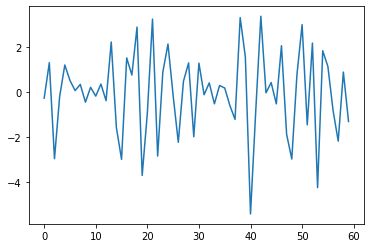

sequence #5 state=1


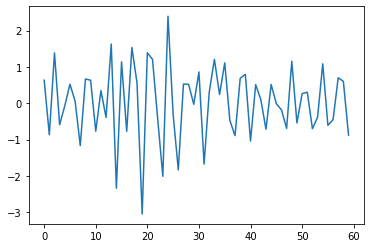

sequence #6 state=0


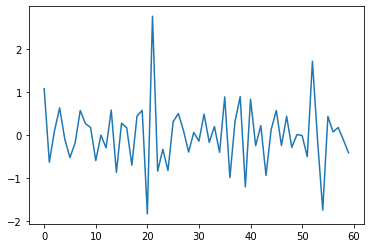

sequence #7 state=0


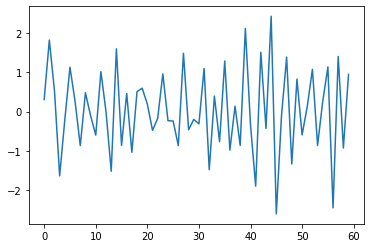

sequence #8 state=0


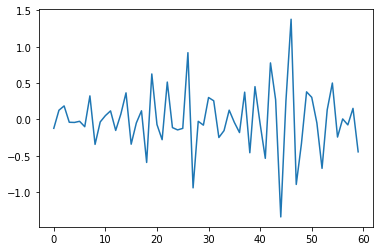

sequence #9 state=0


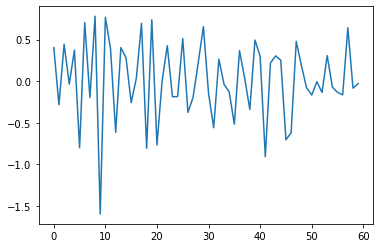

sequence #10 state=0


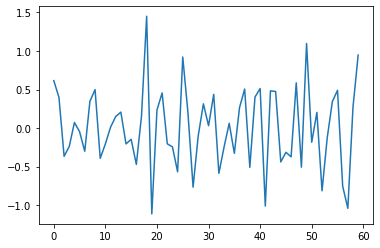

sequence #11 state=1


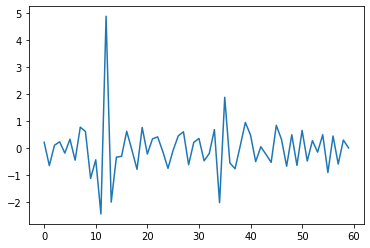

sensor #4
sequence #0 state=0


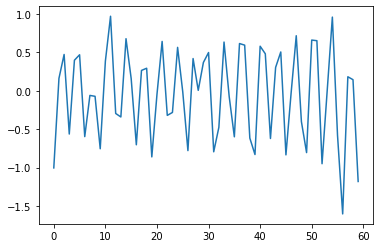

sequence #1 state=1


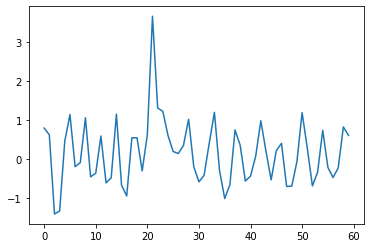

sequence #2 state=1


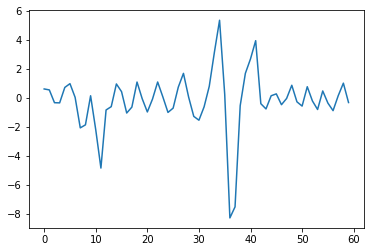

sequence #3 state=1


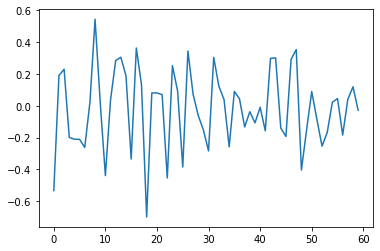

sequence #4 state=1


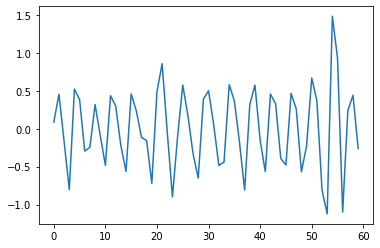

sequence #5 state=1


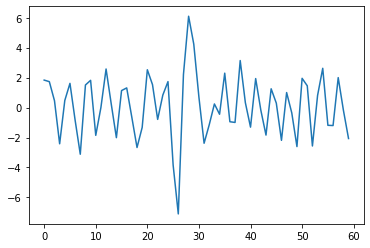

sequence #6 state=0


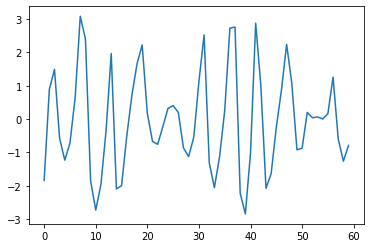

sequence #7 state=0


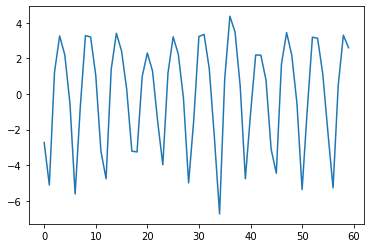

sequence #8 state=0


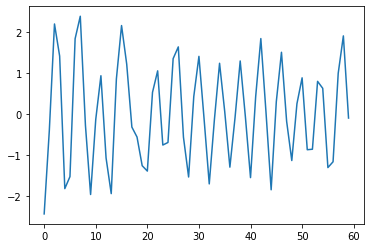

sequence #9 state=0


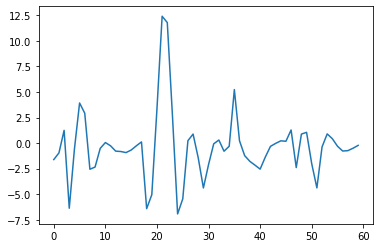

sequence #10 state=0


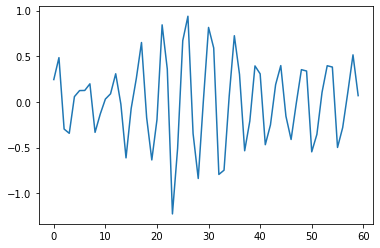

sequence #11 state=1


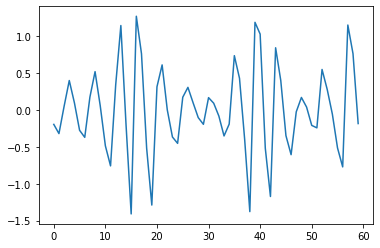

sensor #5
sequence #0 state=0


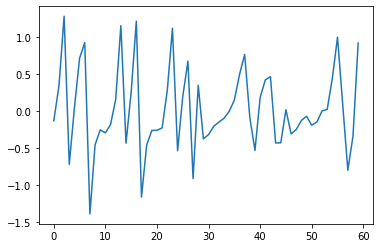

sequence #1 state=1


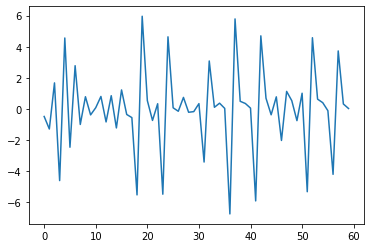

sequence #2 state=1


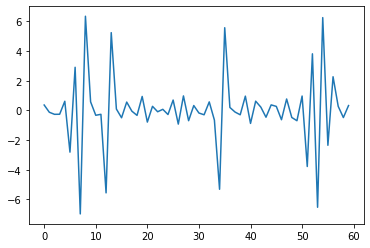

sequence #3 state=1


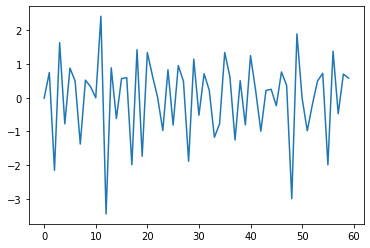

sequence #4 state=1


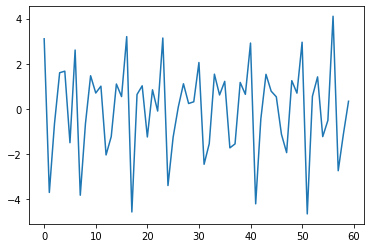

sequence #5 state=1


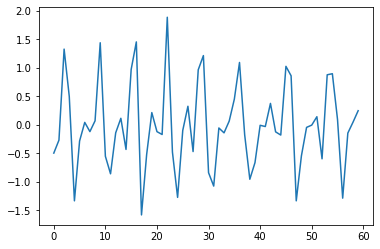

sequence #6 state=0


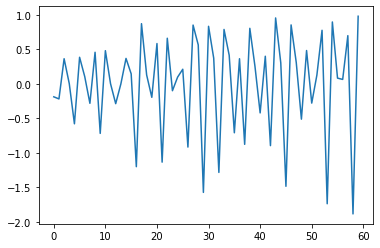

sequence #7 state=0


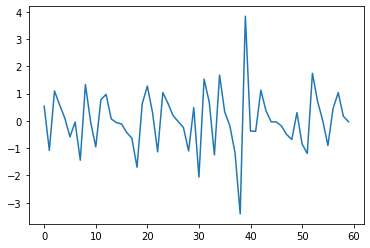

sequence #8 state=0


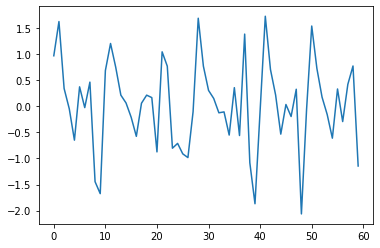

sequence #9 state=0


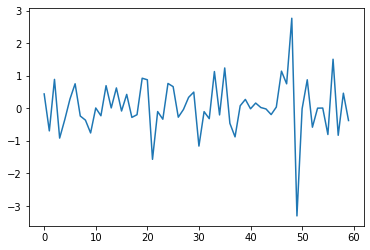

sequence #10 state=0


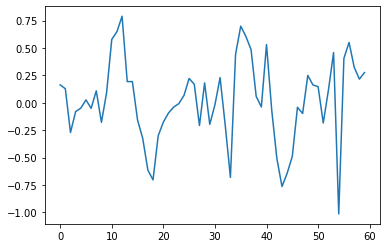

sequence #11 state=1


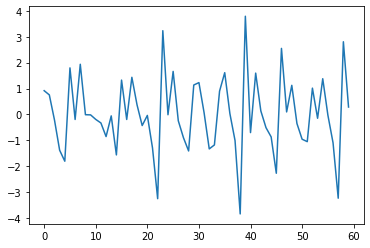

sensor #6
sequence #0 state=0


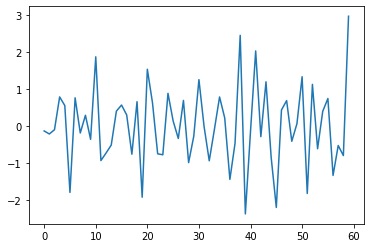

sequence #1 state=1


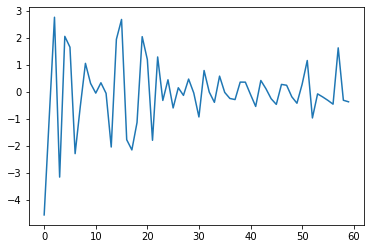

sequence #2 state=1


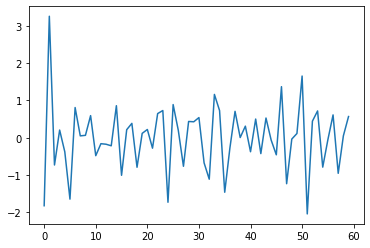

sequence #3 state=1


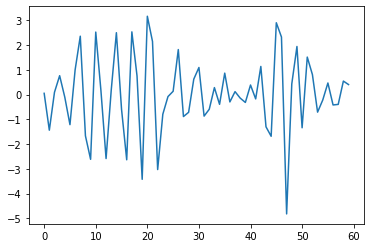

sequence #4 state=1


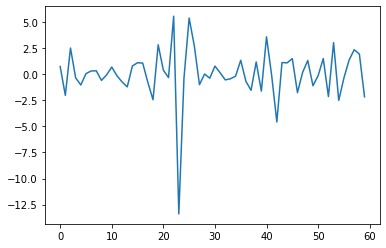

sequence #5 state=1


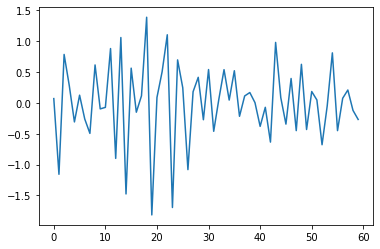

sequence #6 state=0


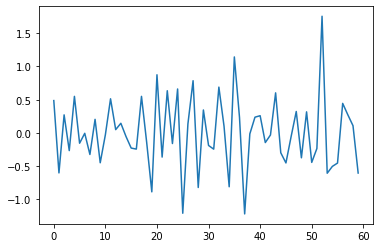

sequence #7 state=0


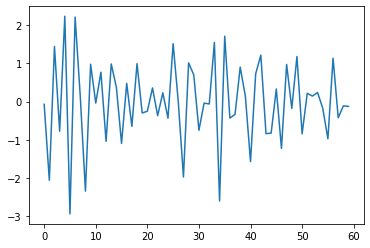

sequence #8 state=0


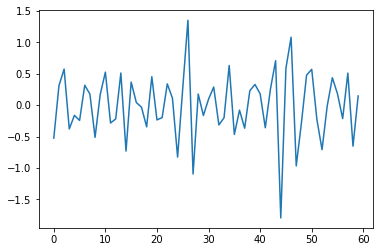

sequence #9 state=0


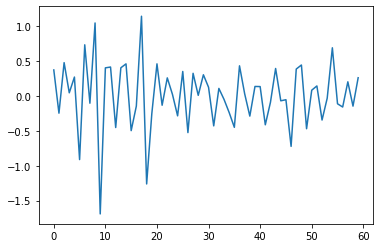

sequence #10 state=0


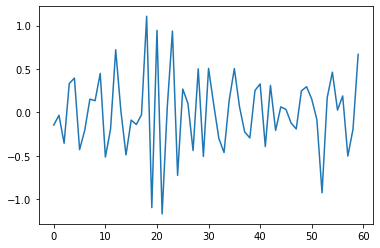

sequence #11 state=1


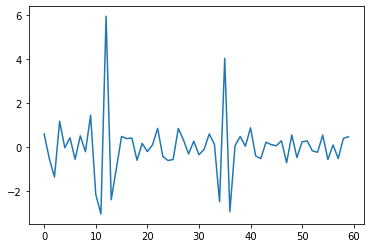

sensor #7
sequence #0 state=0


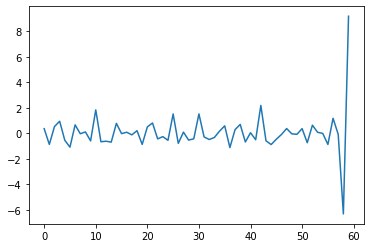

sequence #1 state=1


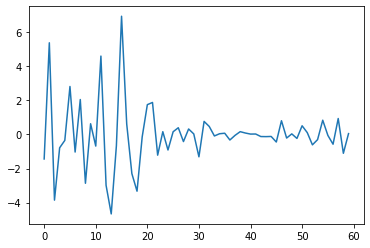

sequence #2 state=1


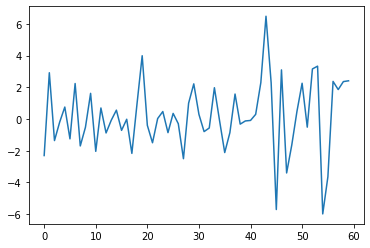

sequence #3 state=1


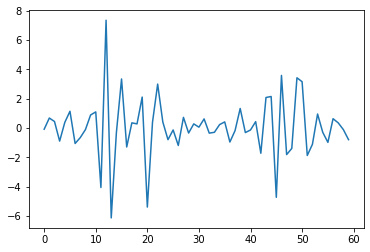

sequence #4 state=1


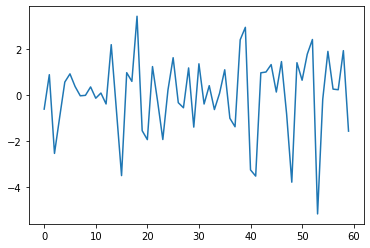

sequence #5 state=1


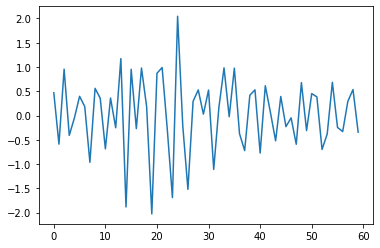

sequence #6 state=0


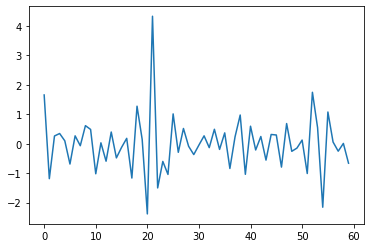

sequence #7 state=0


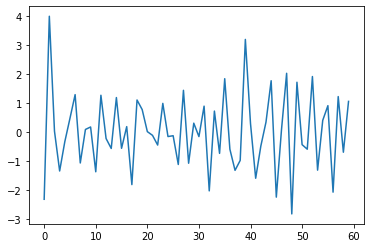

sequence #8 state=0


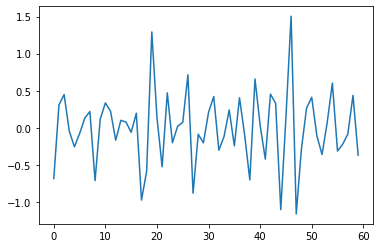

sequence #9 state=0


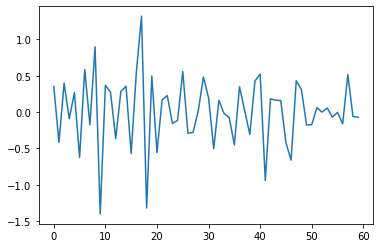

sequence #10 state=0


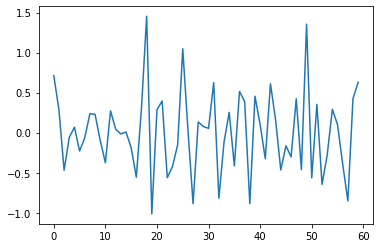

sequence #11 state=1


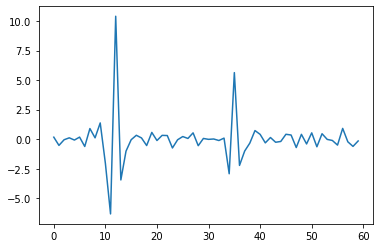

sensor #8
sequence #0 state=0


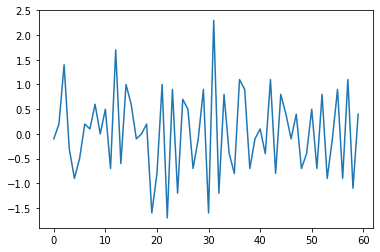

sequence #1 state=1


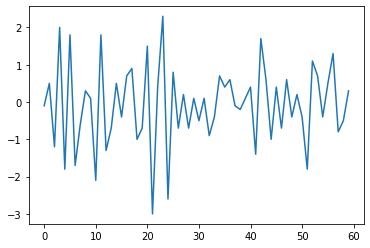

sequence #2 state=1


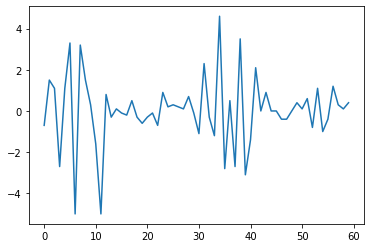

sequence #3 state=1


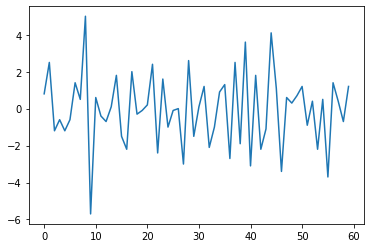

sequence #4 state=1


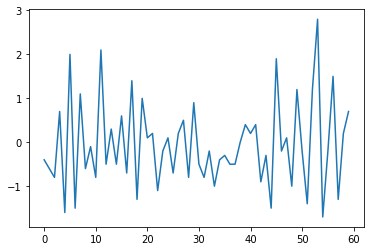

sequence #5 state=1


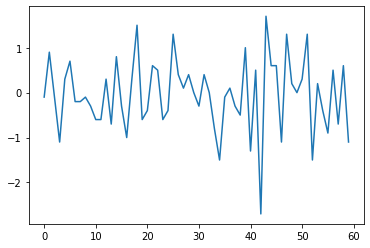

sequence #6 state=0


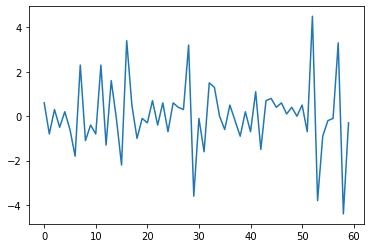

sequence #7 state=0


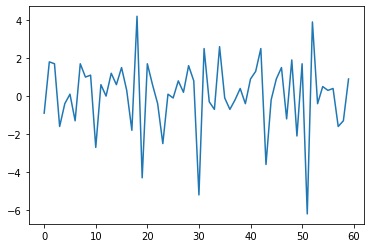

sequence #8 state=0


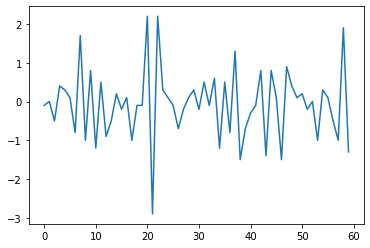

sequence #9 state=0


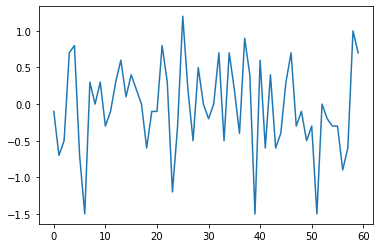

sequence #10 state=0


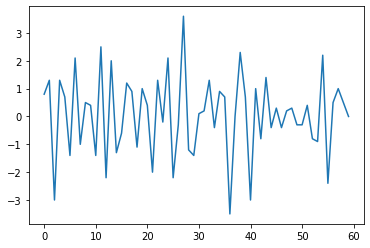

sequence #11 state=1


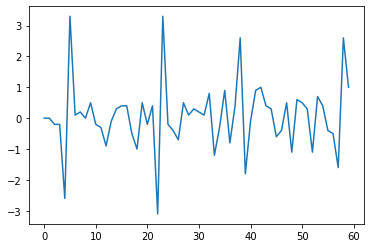

sensor #9
sequence #0 state=0


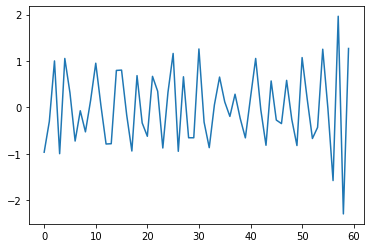

sequence #1 state=1


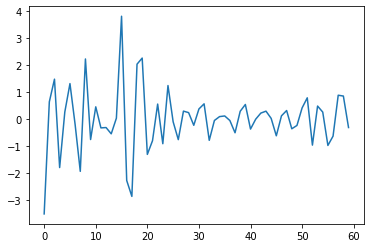

sequence #2 state=1


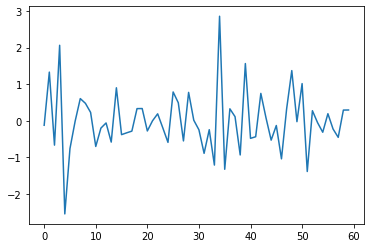

sequence #3 state=1


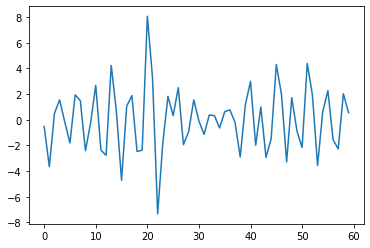

sequence #4 state=1


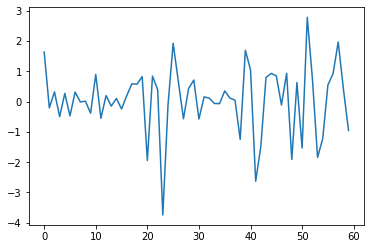

sequence #5 state=1


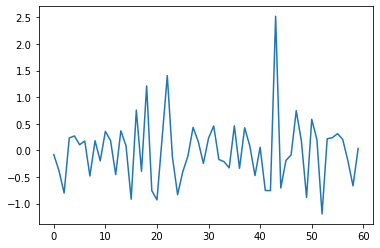

sequence #6 state=0


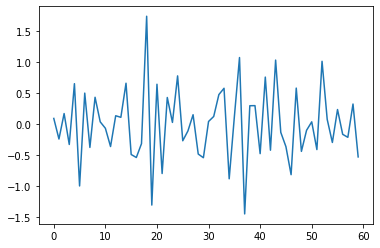

sequence #7 state=0


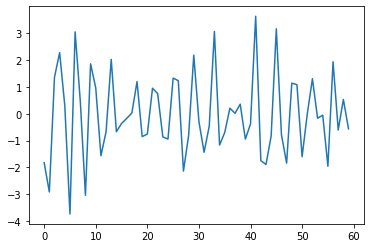

sequence #8 state=0


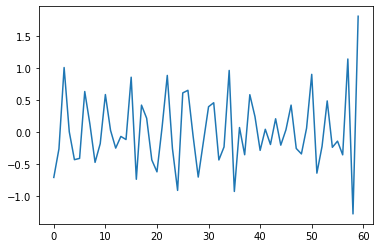

sequence #9 state=0


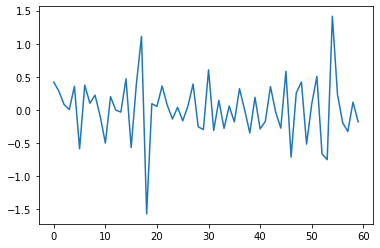

sequence #10 state=0


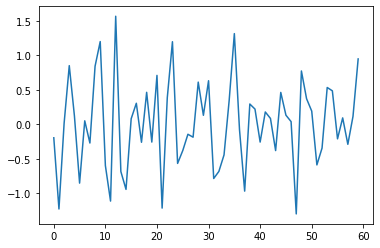

sequence #11 state=1


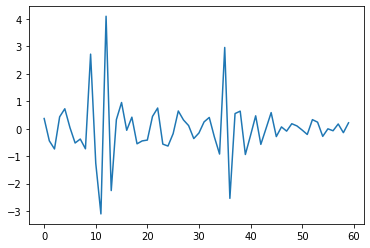

sensor #10
sequence #0 state=0


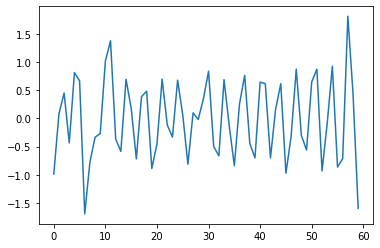

sequence #1 state=1


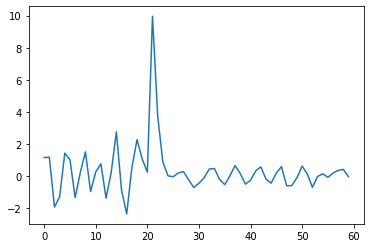

sequence #2 state=1


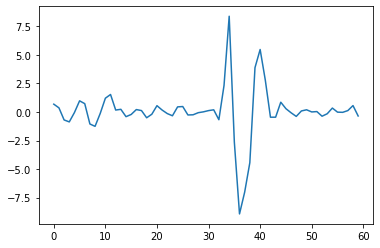

sequence #3 state=1


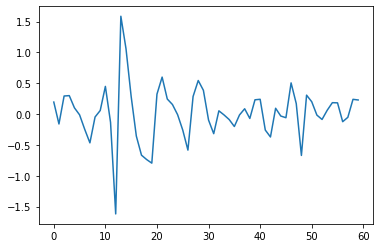

sequence #4 state=1


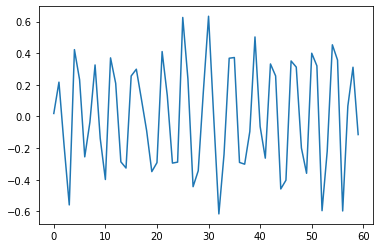

sequence #5 state=1


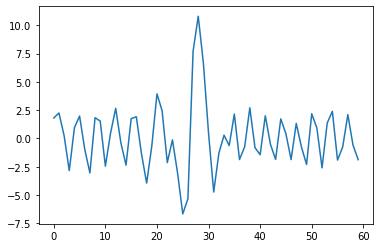

sequence #6 state=0


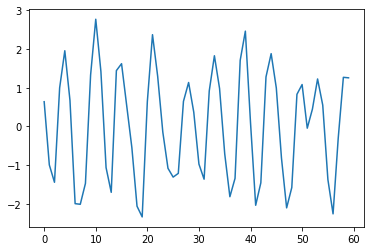

sequence #7 state=0


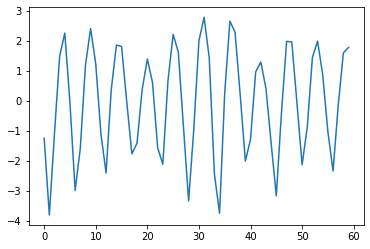

sequence #8 state=0


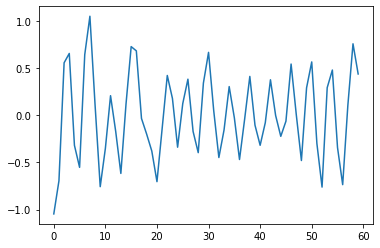

sequence #9 state=0


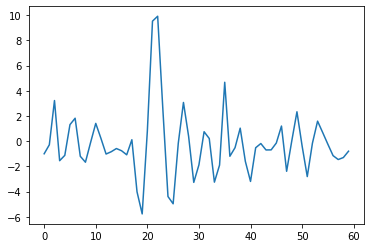

sequence #10 state=0


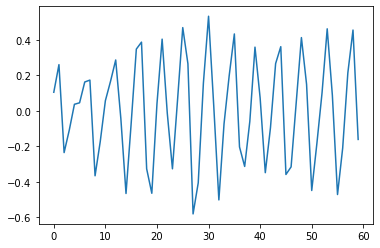

sequence #11 state=1


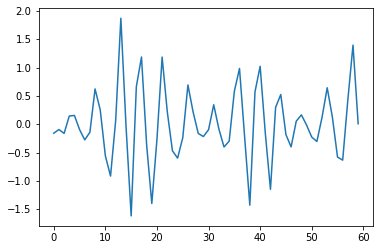

sensor #11
sequence #0 state=0


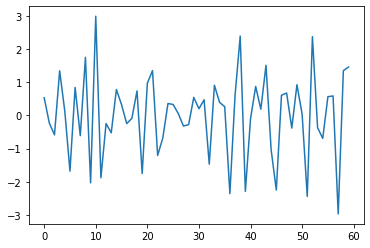

sequence #1 state=1


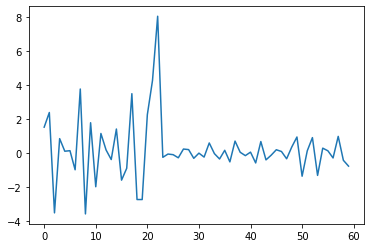

sequence #2 state=1


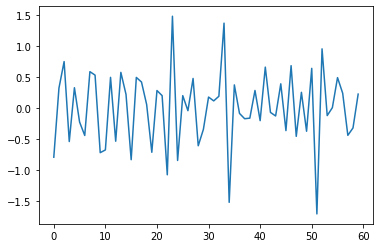

sequence #3 state=1


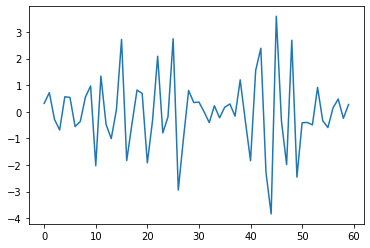

sequence #4 state=1


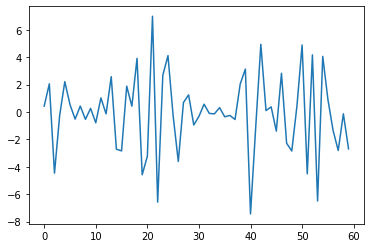

sequence #5 state=1


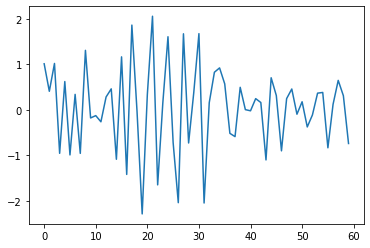

sequence #6 state=0


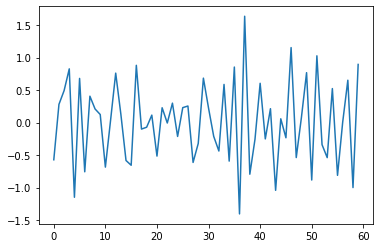

sequence #7 state=0


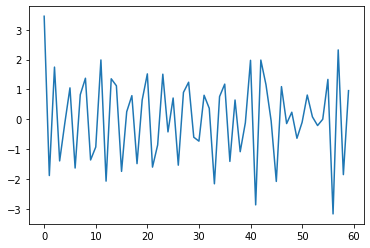

sequence #8 state=0


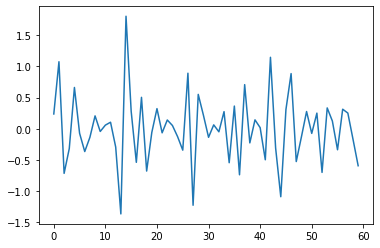

sequence #9 state=0


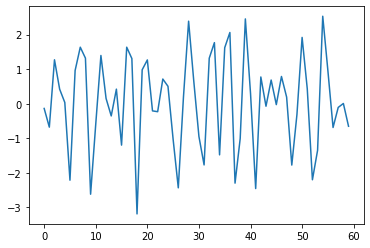

sequence #10 state=0


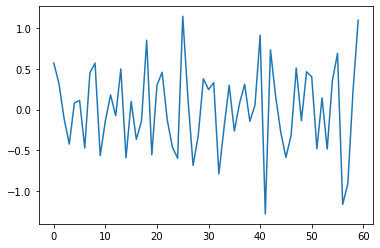

sequence #11 state=1


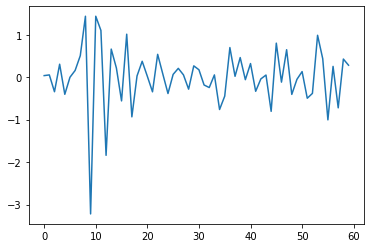

sensor #12
sequence #0 state=0


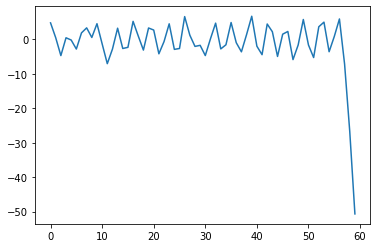

sequence #1 state=1


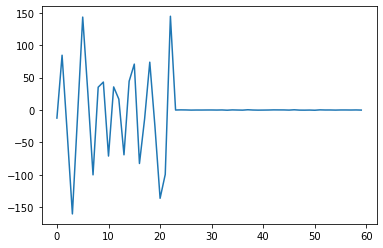

sequence #2 state=1


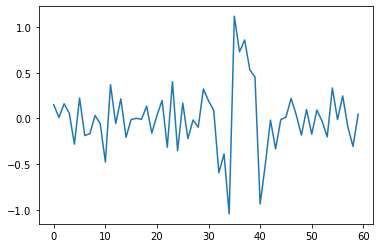

sequence #3 state=1


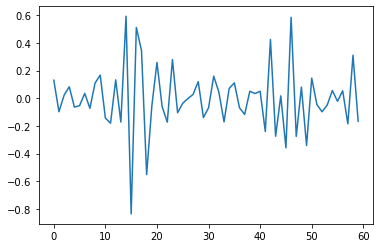

sequence #4 state=1


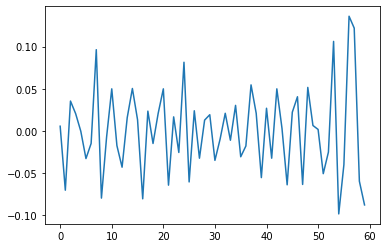

sequence #5 state=1


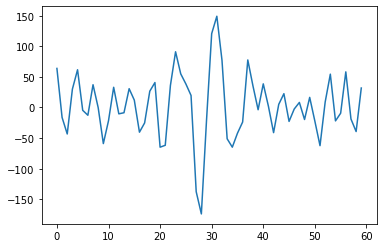

sequence #6 state=0


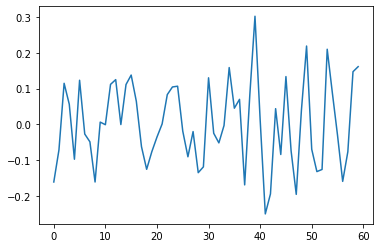

sequence #7 state=0


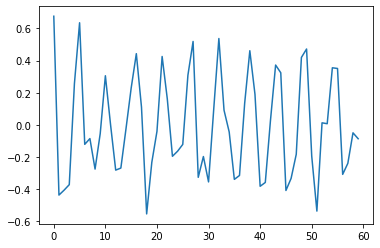

sequence #8 state=0


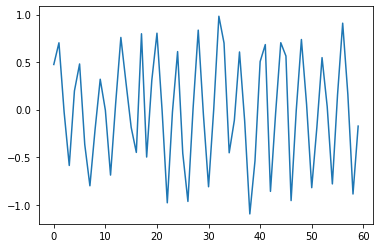

sequence #9 state=0


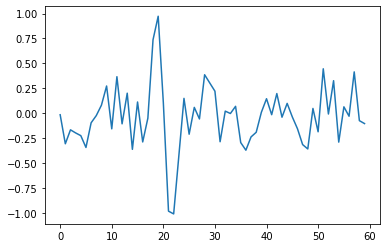

sequence #10 state=0


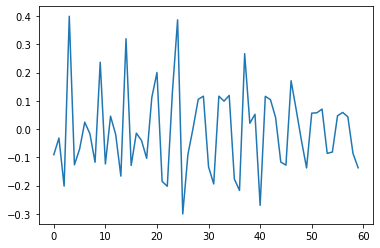

sequence #11 state=1


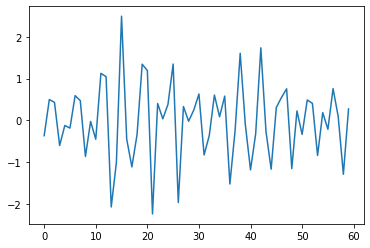

sensor #13
sequence #0 state=0


IndexError: index 13 is out of bounds for axis 1 with size 13

In [4]:
for sensor_nr in range(14):
    print(f'sensor #{sensor_nr}')
    for sequence_nr in range(12):
        print(f'sequence #{sequence_nr} state={labels_train[sequence_nr]}')
        plt.plot(sensor_data_train[sequence_nr, sensor_nr, :])
        plt.show()

In [ ]:
sequence_ids_train